<a href="https://colab.research.google.com/github/Ynwa0411/ML2022/blob/main/Docceptor_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import backend
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.cm as cm

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_std, X_test_std = X_train / 255.0, X_test / 255.0
X_train_std = X_train_std.astype('float32')
X_test_std = X_test_std.astype('float32')
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# image size : (28,28), gray scale #
class LeNet : 
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Conv2D(50, kernel_size = 5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        model.add(Dense(10))
        model.add(Activation("softmax"))
        return model
model = LeNet.build(input_shape = (28, 28, 1), classes = 10)
model.compile(loss = "categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
history = model.fit(X_train_std, y_train_onehot, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 104s 547ms/step - loss: 0.2645 - accuracy: 0.9208 - val_loss: 0.0813 - val_accuracy: 0.9746
Epoch 2/10
188/188 [==============================] - 89s 473ms/step - loss: 0.0643 - accuracy: 0.9799 - val_loss: 0.0678 - val_accuracy: 0.9797
Epoch 3/10
188/188 [==============================] - 89s 476ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.0565 - val_accuracy: 0.9817
Epoch 4/10
188/188 [==============================] - 89s 475ms/step - loss: 0.0318 - accuracy: 0.9905 - val_loss: 0.0484 - val_accuracy: 0.9848
Epoch 5/10
188/188 [==============================] - 87s 465ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 6/10
188/188 [==============================] - 88s 471ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0433 - val_accuracy: 0.9873
Epoch 7/10
188/188 [==============================] - 99s 529ms/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0438 - val_a

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                    

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9


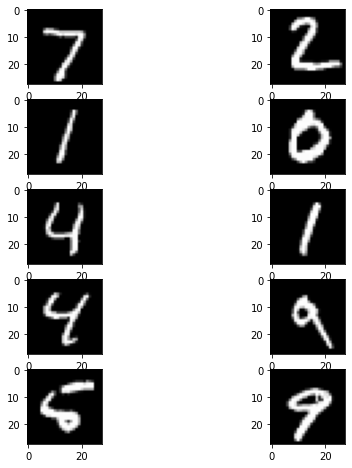

In [ ]:
prediction = model.predict(X_test_std)
idxShuffle = np.random.permutation(len(X_test_std))
plt.figure(figsize = (8,8))
for i in range(10):
  index = idxShuffle[i]
  plt.subplot(5,2,i+1)
  plt.imshow(X_test_std[i], cmap = cm.gray)
  print(np.argmax(prediction[i]), np.argmax(y_test_onehot[i]))
plt.show()

In [ ]:
# Normalize filters (min/max) #
filters , bias = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters_norm = (filters - f_min) / (f_max - f_min)

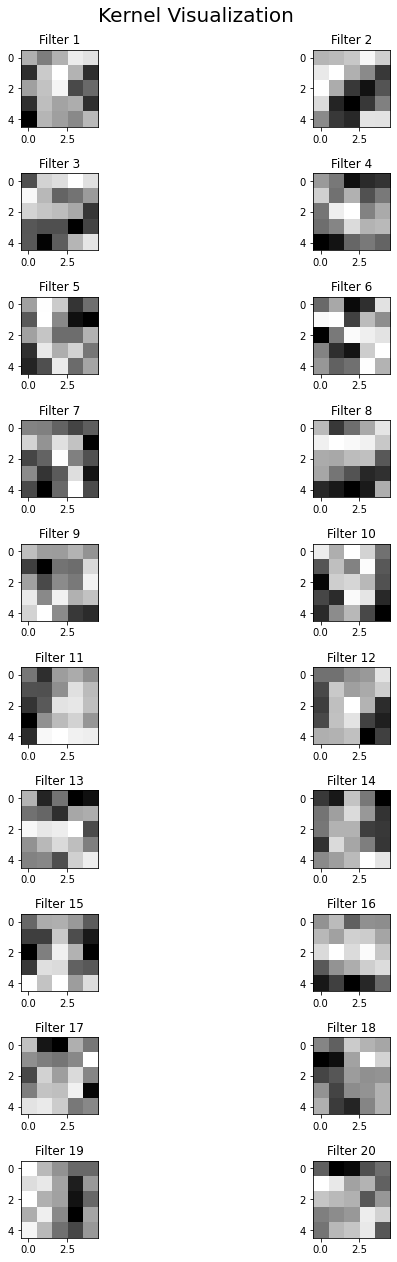

In [ ]:
# 첫번째 convolutional layer의 kernel #
n_filters = filters_norm.shape[-1]
n_channel = filters_norm.shape[-2]
ix = 1
plt.figure(figsize = (10,20))
plt.subplots_adjust(top=0.95, hspace = 0.6, wspace = 0.1)
for i in range(n_filters):
    # get the filters
    f = filters_norm[:,:,:,i]
    for j in range(n_channel):
        # subplot for 6 filters and 1 channel     
        plt.subplot(n_filters/2,n_channel*2,i+1)
        plt.imshow(f[:,:,j] ,cmap=cm.gray)
        plt.title('Filter {}'.format(i+1))
plt.suptitle('Kernel Visualization', fontsize = 20)
plt.show()

(1, 28, 28, 1)

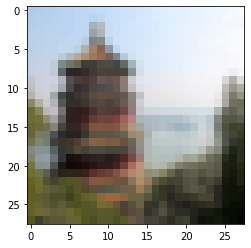

In [ ]:
# Sample image preprocessing #
from sklearn.datasets import load_sample_image
from skimage.transform import resize

china = load_sample_image('china.jpg')   
china_resize = resize(china, (28,28,3))
plt.imshow(china_resize)
china_test = np.expand_dims(np.expand_dims(china_resize[:,:,0], axis = -1), axis = 0)
china_test.shape

In [ ]:
for layer in model.layers:
  print(layer.output.shape)
  print(layer)

(None, 28, 28, 20)
(None, 28, 28, 20)
(None, 14, 14, 20)
(None, 14, 14, 50)
(None, 14, 14, 50)
(None, 7, 7, 50)
(None, 2450)
(None, 500)
(None, 500)
(None, 10)
(None, 10)


In [ ]:
# test를 위한 객체 생성 #
layer_output = [model.layers[i].output for i in range(len(model.layers))]
feature_map_model = tf.keras.models.Model(inputs = model.input, outputs = layer_output)
feature_map = feature_map_model.predict(china_test)

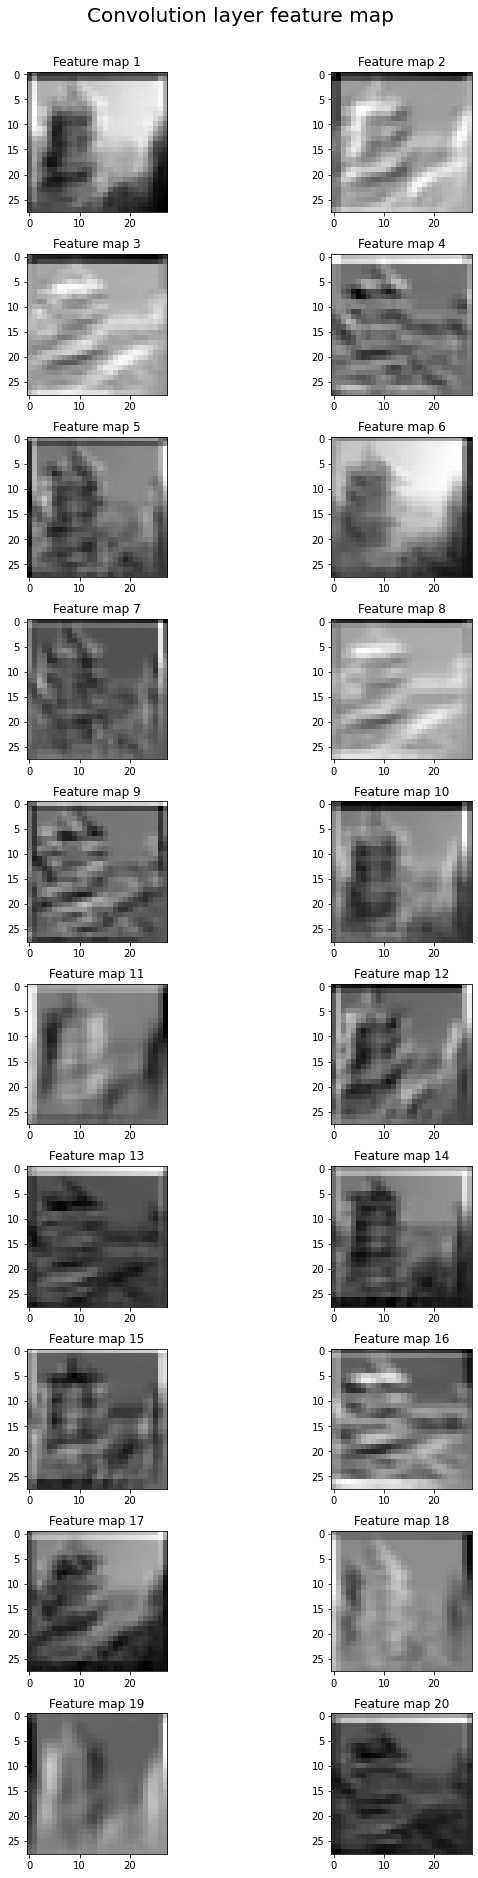

In [ ]:
# Convolution layer (1,28,28,20) #
n_features = feature_map[0].shape[-1]
n_channels = feature_map[0].shape[0]
plt.figure(figsize = (10,30))
for i in range(n_features):
  for j in range(n_channels):
    plt.subplot(n_features / 2, n_channels * 2, i+1)
    plt.imshow(feature_map[0][j,:,:,i], cmap = cm.gray)
    plt.title('Feature map {}'.format(i+1))
plt.suptitle('Convolution layer feature map', fontsize = 20)
plt.subplots_adjust(top = 0.95, hspace = 0.3)
plt.show()

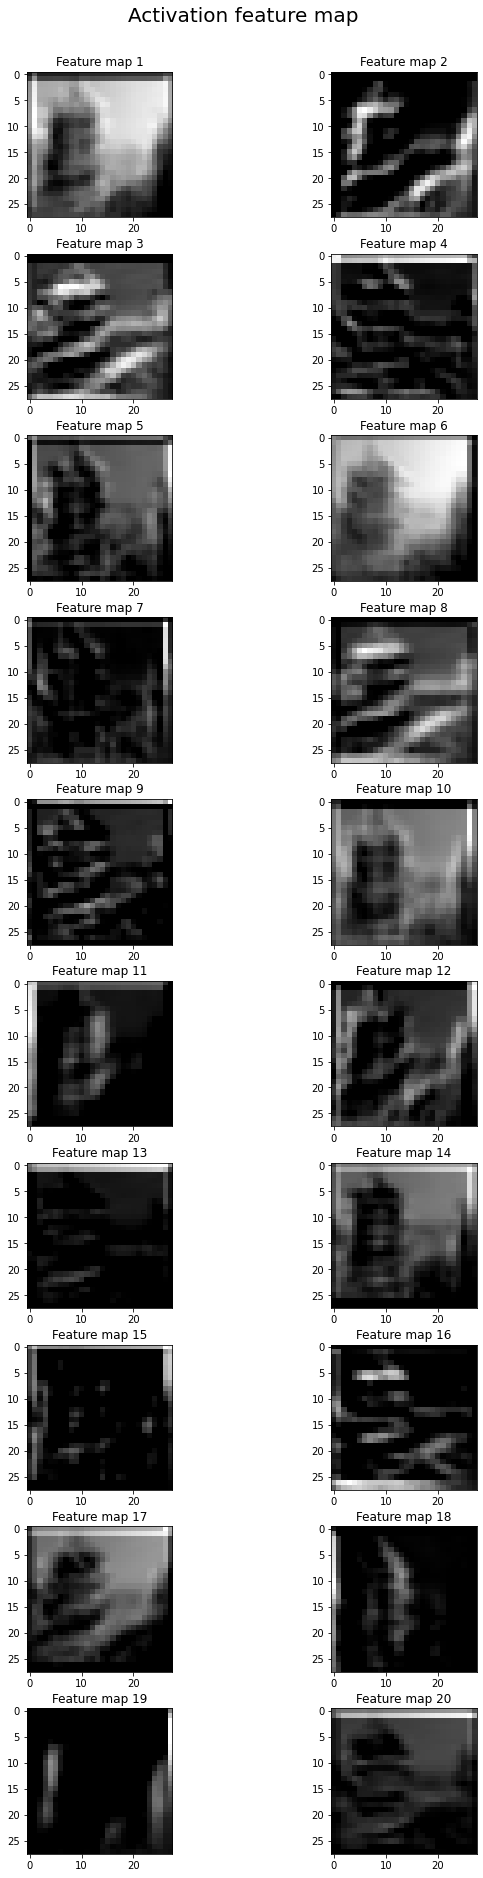

In [ ]:
# Activation (1,28,28,20) #
n_features = feature_map[1].shape[-1]
n_channels = feature_map[1].shape[0]

plt.figure(figsize = (10,30))
for i in range(n_features):
  for j in range(n_channels):
    plt.subplot(n_features / 2, n_channels * 2, i+1)
    plt.imshow(feature_map[1][j,:,:,i], cmap = cm.gray)
    plt.title('Feature map {}'.format(i+1))
plt.suptitle('Activation feature map',fontsize = 20)
plt.subplots_adjust(top = 0.95, hspace = 0.25)
plt.show()

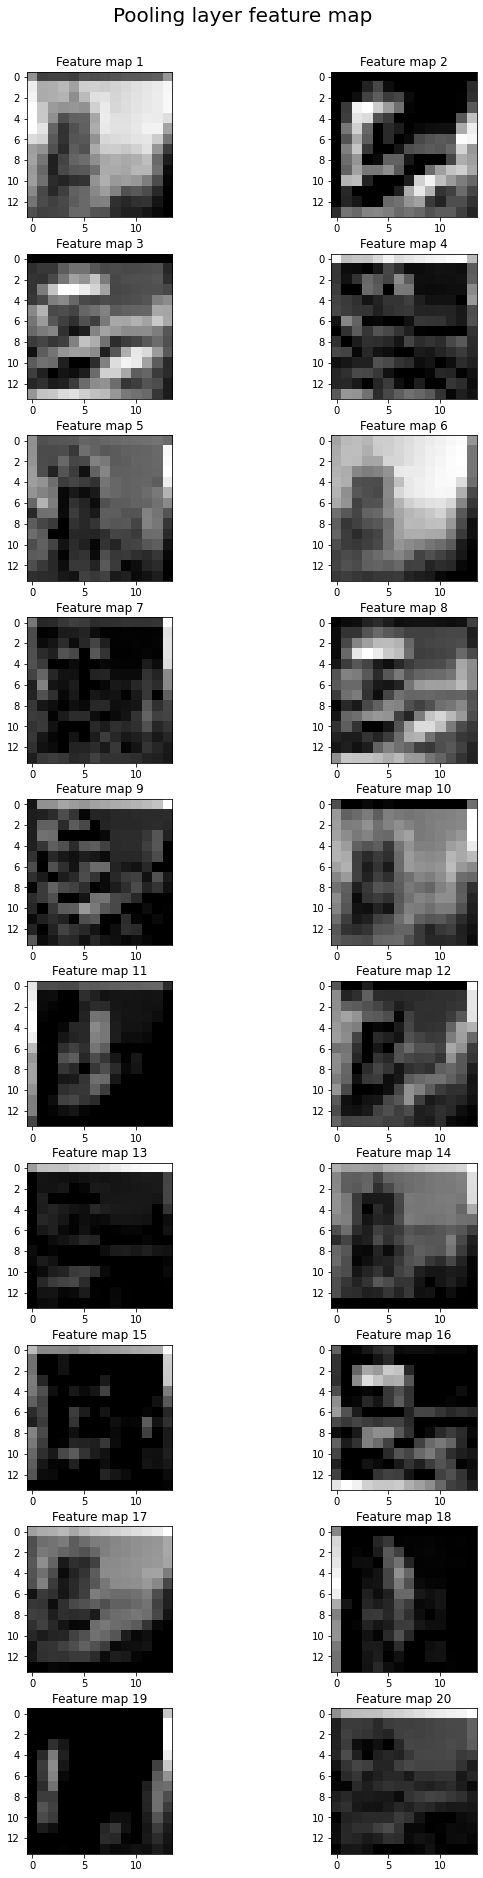

In [ ]:
# Pooling layer (1,14,14,20) #
n_features = feature_map[2].shape[-1]
n_channels = feature_map[2].shape[0]
plt.figure(figsize = (10,30))
for i in range(n_features):
  for j in range(n_channels):
    plt.subplot(n_features / 2, n_channels * 2, i+1)
    plt.imshow(feature_map[2][j,:,:,i], cmap = cm.gray)
    plt.title('Feature map {}'.format(i+1))
plt.suptitle('Pooling layer feature map', fontsize = 20)
plt.subplots_adjust(top = 0.95, hspace = 0.25)
plt.show()

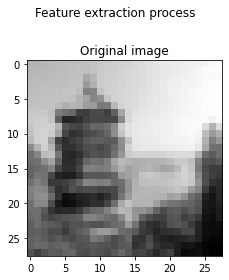

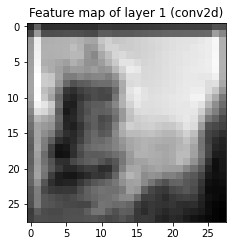

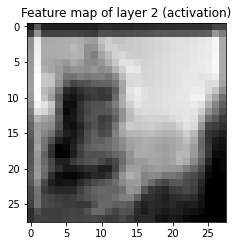

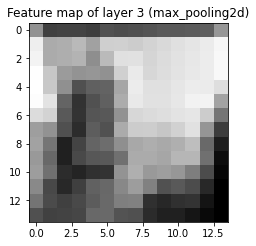

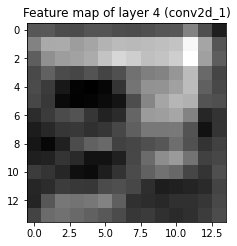

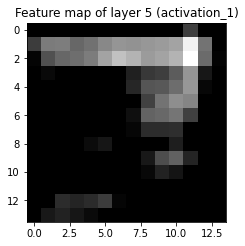

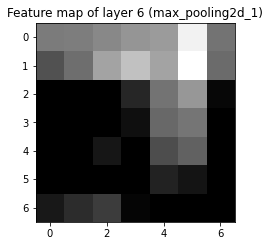

In [ ]:
# Image 의 변화과정 #
feature_4dim = [feature_map[i] for i in range(len(feature_map)) if feature_map[i].ndim == 4]
plt.figure(figsize = (10,25))
plt.suptitle('Feature extraction process',ha = 'center')
plt.subplots_adjust(top = 0.95, hspace = 0.1)

plt.subplot(len(feature_4dim)+1, 1, 1)
plt.imshow(china_test[0,:,:,0], cmap = cm.gray)
plt.title('Original image')

for i in range(len(feature_4dim)):
  plt.figure(figsize = (10,30))
  plt.subplot(len(feature_4dim)+1, 1, i+2)
  plt.imshow(feature_map[i][0,:,:,0], cmap = cm.gray)
  plt.title('Feature map of layer {} ({})'.format((i+1), model.layers[i].name))
plt.show()

CIFAR-10 classification using CNN

In [ ]:
from keras import backend
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.cm as cm

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_1 = unpickle('data_batch_1')
data_2 = unpickle('data_batch_2')
data_3 = unpickle('data_batch_3')
data_4 = unpickle('data_batch_4')
data_5 = unpickle('data_batch_5')
test_data = unpickle('test_batch')
batch = unpickle('batches.meta')

In [ ]:
data_batch_test = {}
for key, value in batch.items():
  data_batch_test[key.decode('utf-8')] = value

In [ ]:
# bytes -> string #
data1 = {}
data2 = {}
data3 = {}
data4 = {}
data5 = {}
data_test = {}
data_batch = {}
new_dict_list = [data1, data2, data3, data4, data5, data_test, batch]
dict_list = [data_1,data_2,data_3,data_4,data_5,test_data, data_batch]

for i in range(len(dict_list)):
  for key,values in dict_list[i].items():
    key_str = key.decode('utf-8')
    new_dict_list[i][key_str] = []
    if type(values[0]) == bytes:
      for value in values:
        new_dict_list[i][key_str].append(value.decode('utf-8'))
    else:
      for value in values:
        new_dict_list[i][key_str].append(value)

In [ ]:
# RGB 순으로 array가 들어있기 때문에 데이터 변환 #
# (3,32,32) -> (32,32,3) #
#  0  1  2  ->   1  2 0  #

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X_train_test = np.zeros([5,10000,32,32,3])

for i in range(5):
  for j in range(len(new_dict_list[i]['data'])):
    X_train_test[i,j,:,:,:] = new_dict_list[i]['data'][j].reshape(3,32,32).transpose(1,2,0)

X_train = np.r_[X_train_test[0],X_train_test[1]]
for i in range(3):
  X_train = np.r_[X_train, X_train_test[i+2]]

X_test = np.zeros([len(data_test['data']),32,32,3])
for i in range(len(data_test['data'])):
  X_test[i] = data_test['data'][i].reshape(3,32,32).transpose(1,2,0)

X_test_std = X_test / 255.0
X_train_std = X_train / 255.0

In [ ]:
y_train = np.array([])
for i in range(5):
  y_train = np.r_[y_train,new_dict_list[i]['labels']]
y_test = np.array(data_test['labels']).reshape(-1,1)

y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

label = {0:'airplane',
         1:'automobile',
         2:'bird',
         3:'cat',
         4:'deer',
         5:'dog',
         6:'frog',
         7:'horse',
         8:'ship',
         9:'truck'}

In [ ]:
print(X_train_std.shape, X_test_std.shape, y_train_onehot.shape, y_test_onehot.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


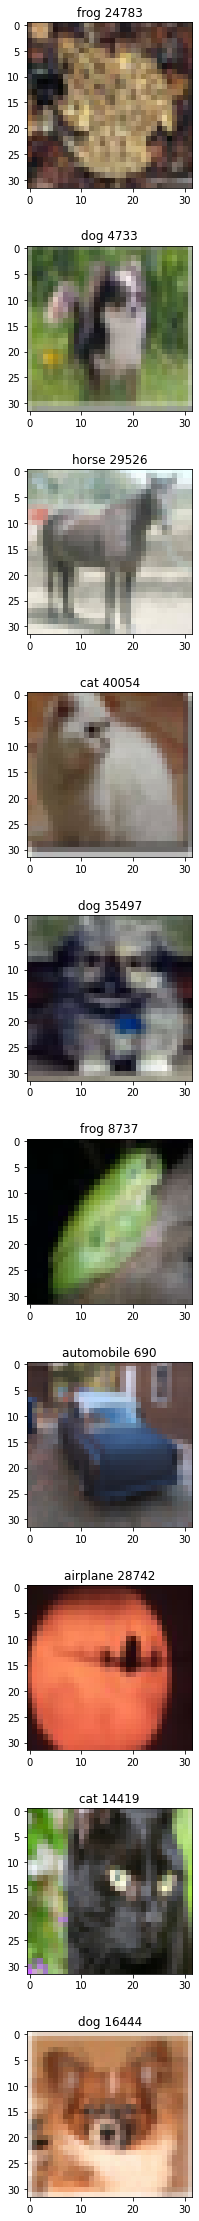

In [ ]:
idxShuffle = np.random.permutation(len(X_train_std))
plt.figure(figsize = (20,40))
plt.subplots_adjust(hspace = 0.35)
for i in range(10):
  index = idxShuffle[i]
  plt.subplot(10,1,i+1)
  plt.imshow(X_train_std[index])
  plt.title("{} {}".format(label[np.argmax(y_train_onehot[index])],index))
plt.show()

In [ ]:
# image size : (32,32,3), RGB scale #
class LeNet : 
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Conv2D(50, kernel_size = 5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        model.add(Dense(10))
        model.add(Activation("softmax"))
        return model
model = LeNet.build(input_shape = (32, 32, 3), classes = 10)
model.compile(loss = "categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics=["accuracy"])
history = model.fit(X_train_std, y_train_onehot, batch_size=100, epochs=10, verbose=1)

Epoch 1/10
500/500 [==============================] - 157s 313ms/step - loss: 1.4158 - accuracy: 0.4923
Epoch 2/10
500/500 [==============================] - 154s 308ms/step - loss: 1.0505 - accuracy: 0.6310
Epoch 3/10
500/500 [==============================] - 160s 319ms/step - loss: 0.8832 - accuracy: 0.6905
Epoch 4/10
500/500 [==============================] - 141s 282ms/step - loss: 0.7520 - accuracy: 0.7351
Epoch 5/10
500/500 [==============================] - 150s 300ms/step - loss: 0.6336 - accuracy: 0.7789
Epoch 6/10
500/500 [==============================] - 130s 260ms/step - loss: 0.5124 - accuracy: 0.8224
Epoch 7/10
500/500 [==============================] - 131s 262ms/step - loss: 0.3973 - accuracy: 0.8632
Epoch 8/10
500/500 [==============================] - 131s 261ms/step - loss: 0.2883 - accuracy: 0.9033
Epoch 9/10
500/500 [==============================] - 131s 262ms/step - loss: 0.1994 - accuracy: 0.9343
Epoch 10/10
500/500 [==============================] - 131s 262m

In [ ]:
prediction_CIFAR = model.predict(X_test_std)

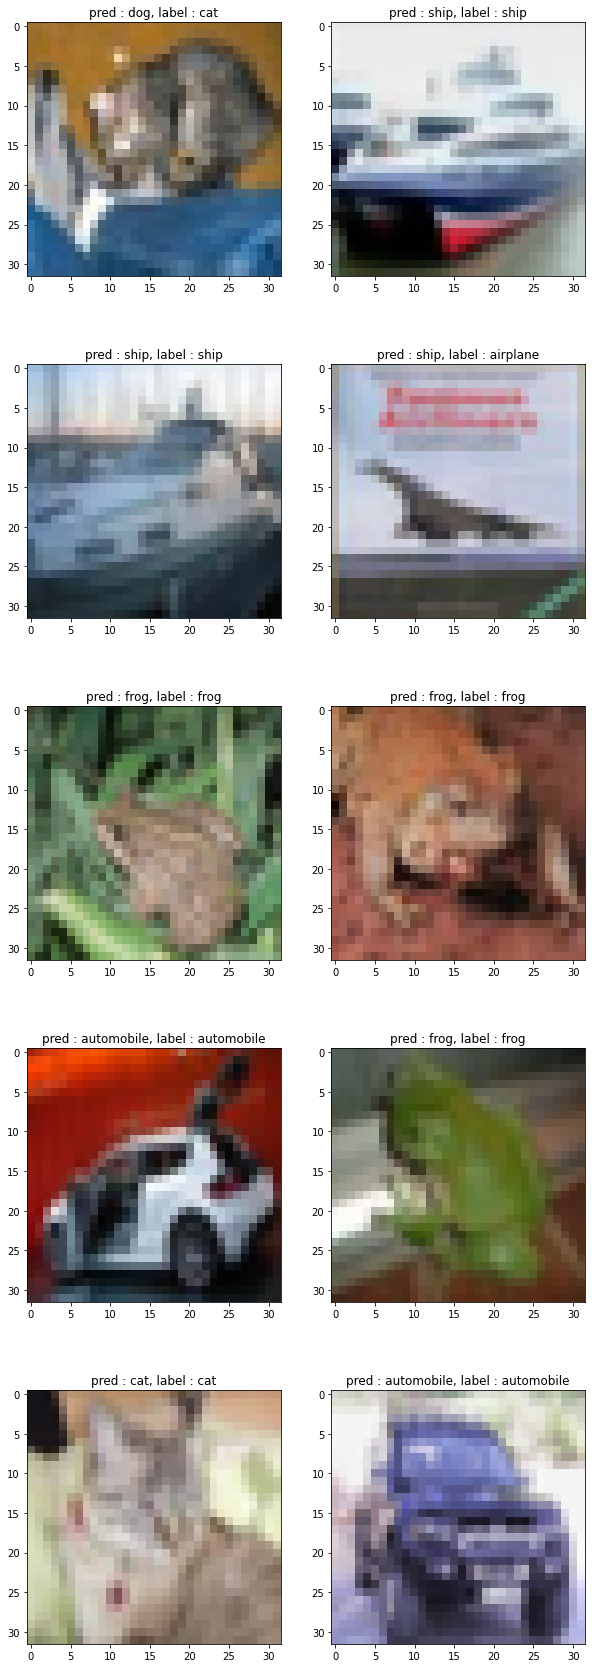

In [ ]:
idxShuffle = np.random.permutation(len(X_test_std))
plt.figure(figsize = (10,30))
plt.subplots_adjust(hspace = 0.3)
for i in range(10):
  index = idxShuffle[i]
  plt.subplot(5,2,i+1)
  plt.title('pred : {}, label : {}'.format(label[np.argmax(prediction_CIFAR[i])], label[np.argmax(y_test_onehot[i])]))
  plt.imshow(X_test_std[i])
plt.show()

(1, 32, 32, 3)

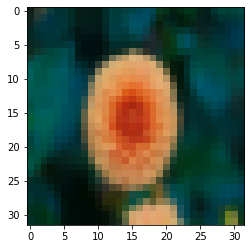

In [ ]:
from sklearn.datasets import load_sample_image
from skimage.transform import resize

flower = load_sample_image('flower.jpg')   
flower_resize = resize(flower, (32,32,3))
plt.imshow(flower_resize)
flower_test = np.expand_dims(flower_resize, axis = 0)
flower_test.shape

In [ ]:
# Normalize filters (min/max) #
filters , bias = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters_norm = (filters - f_min) / (f_max - f_min)
filters_norm.shape

(5, 5, 3, 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


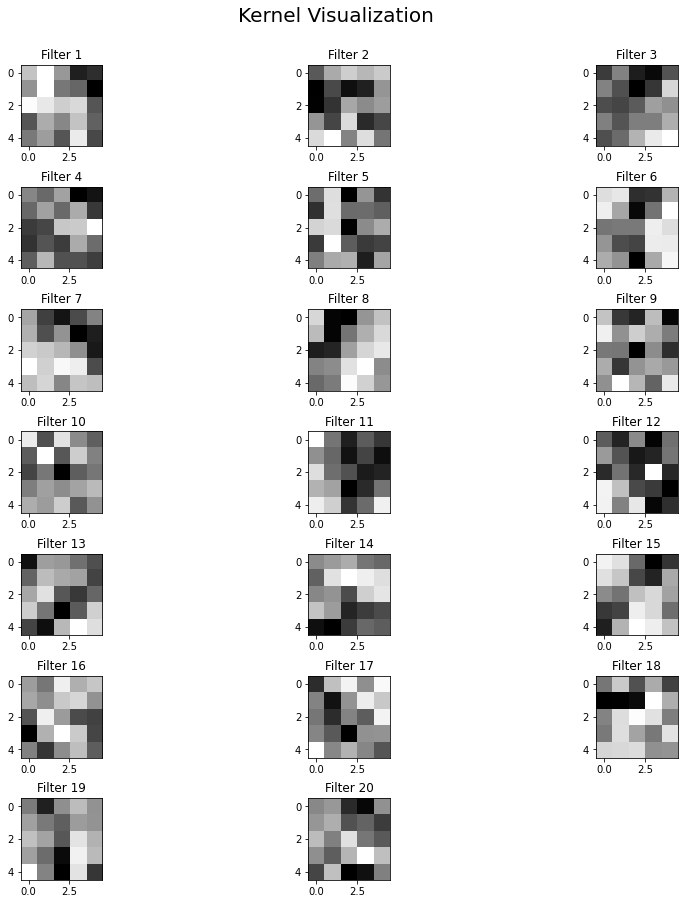

In [ ]:
# 첫번째 convolutional layer의 kernel #
n_filters = filters_norm.shape[-1]
n_channel = filters_norm.shape[-2]
plt.figure(figsize = (15,40))
plt.subplots_adjust(top=0.96, hspace = 0.5, wspace = 0.1)
for i in range(n_filters):
    # get the filters
    f = filters_norm[:,:,:,i]
    for j in range(n_channel):
        # subplot for 20 filters and 3 channel     
        plt.subplot(n_filters,n_channel,i+1)
        plt.imshow(f[:,:,j], cmap = cm.gray)
        plt.title('Filter {}'.format(i+1))
plt.suptitle('Kernel Visualization', fontsize = 20)
plt.show()

In [ ]:
# test를 위한 객체 생성 #
layer_output = [model.layers[i].output for i in range(len(model.layers))]
feature_map_model = tf.keras.models.Model(inputs = model.input, outputs = layer_output)
feature_map = feature_map_model.predict(flower_test)

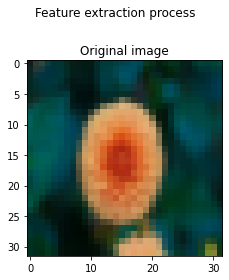

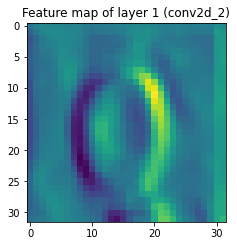

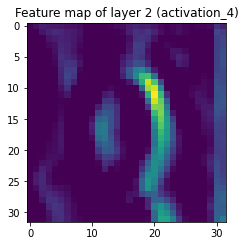

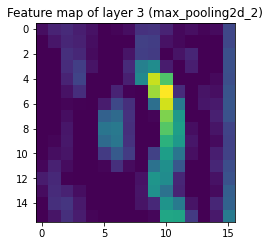

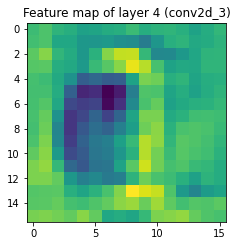

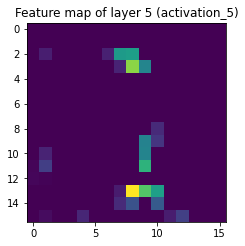

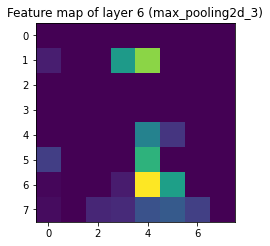

In [ ]:
# Image 의 변화과정 #
feature_4dim = [feature_map[i] for i in range(len(feature_map)) if feature_map[i].ndim == 4]
plt.figure(figsize = (10,25))
plt.suptitle('Feature extraction process',ha = 'center')
plt.subplots_adjust(top = 0.95, hspace = 0.1)

plt.subplot(len(feature_4dim)+1, 1, 1)
plt.imshow(flower_test[0])
plt.title('Original image')

for i in range(len(feature_4dim)):
  plt.figure(figsize = (10,30))
  plt.subplot(len(feature_4dim)+1, 1, i+2)
  plt.imshow(feature_map[i][0,:,:,0])
  plt.title('Feature map of layer {} ({})'.format((i+1), model.layers[i].name))
plt.show()